<h1 style='text-align: center'>NBA Stats 1950-2017<h1>
<h3 style='text-align: center'>By: Evan Ordona</h3>
<hr>

<h2 style='text-align: center'>Introduction</h2>
<p>
In this beginner friendly data science project we're diving into the world of NBA player statistics and their shooting skills. Together, we will go through the entire data science pipeline: Data Collection, Data Cleaning, Data Exploration & Visualization, Hypothesis Testing & Machine Learning, and our Conclusion. This journey involves exploring a dataset of player information scraped from "basketball-reference.com" to uncover observations of shooting efficiency in basketball. Throughout this exploration, we'll be focusing on answering some questions that will provide us with a deeper understanding of how players excel in their shooting abilities. I'm very excited for this project, and hope you are too, as I am a big NBA fan and hope to learn some neat insights by exploring and analyzing this dataset.

To start off, we'll be on the lookout for players who stand out with the highest field goal percentage, three-point percentage, and free throw percentage. These metrics offer us a glimpse into the precision and consistency of a player's shot-making across different scenarios on the court. By identifying these top performers, we can gain insights into what sets them apart in terms of accuracy and reliability in scoring.

We will also be taking a look at player positions and investigating whether shooting percentages exhibit variations based on these roles—namely, guards, forwards, and centers. Exploring this aspect can unveil whether certain positions are more likely to achieving higher shooting efficiency or if players in specific roles exhibit distinct shooting patterns.

Furthermore, we're also going to try and determine if there's a connection between a player's physical attributes, like height, and their shooting efficiency. This exploration aims to see if there are factors beyond simply skill that contribute to a player's success in making a basket.

Lastly, we'll be examining how player statistics evolve over the course of their careers. We'll try to identify trends that show whether players tend to improve or experience declines in their shooting efficiency as their careers progress. 
</p>
<h2 style='text-align: center'>Data Collection</h2>
<p>
In this section, we will import all the data we need using Python. Python will be the language used throughout the project with relevant Python libraries. Python is a great beginner friendly language that data scientists use the industry. I have found a dataset that has all NBA Player statistics since the 1950s up to 2017. Unfortunately, we will be leaving out the statistics of the last few years since the dataset does not contain up to the current year 2023. However, experts and myself agree that within the past couple years the strategy of the game has shifted to shooting much more three point shots which may skew some of the data. 

Data Source: https://www.kaggle.com/datasets/drgilermo/nba-players-stats

Let's finally begin with importing the libraries we will be using. This can be done using pip install <i>library_name</i>. See https://pip.pypa.io/en/stable/cli/pip_install/ for more details.
</p>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import linregress
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

<p>
As you can see there are quite a bit of imports that we will be using in this project. Pandas and numpy are essential libraries for data science in Python. Pandas allows us to store and manipulate datasets with ease. Numpy allows us to create and manipulate arrays and generate data. Matplotlib and seaborn will help us visualize data and create beautiful plots. The rest of the imports will be used for ML and creating models! 

Now that we have our imports, let's read in and examine our first dataset (all datasets available to download from the above kaggle link).
</p>

In [33]:
player_data = pd.read_csv("player_data.csv")
player_data.head(10)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University
9,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN


<p>
Looking at this dataset, we can see that it contains every players' height, weight, and some other interesting facts about them. Let's continue on and import our other dataset. 
</p>

In [34]:
season_stats = pd.read_csv("Seasons_Stats.csv")
season_stats.head(10)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


<p>
The first first thing I notice about this dataset is the amount fo NaN values and that there is 53 columns. This dataset will need to undergo some cleaning and transformation so we can analyze the data properly later on.
</p>

<h2 style='text-align: center'>Data Cleaning</h2>
<p>
Now that we have our dataset imported, we must clean and tidy it up so we can manipulate the dataset easier. It is also important for data visualization and machine learning. This is because having NA values in our dataset can cause errors when trying to plot a graph or train a model. Based on the <code>player_data</code> dataframe, there isn't much we need to do/clean. We won't be using this dataset much, besides looking at the players heights and weights. Let's simply extract the columns we will be using from this dataset.
</p>

In [35]:
# Retrieves only the columns specified
player_data = player_data[['name', 'position', 'height', 'weight', 'year_start']]

# Rename the columns to match the other dataset we will be merging on
player_data.rename(columns = {'name':'Player', 'position':'Pos',
                              'height':'Height', 'weight':'Weight'}, inplace = True)
                              
player_data

,Player,Pos,Height,Weight,year_start
0,Alaa Abdelnaby,F-C,6-10,240.0,1991
1,Zaid Abdul-Aziz,C-F,6-9,235.0,1969
2,Kareem Abdul-Jabbar,C,7-2,225.0,1970
3,Mahmoud Abdul-Rauf,G,6-1,162.0,1991
4,Tariq Abdul-Wahad,F,6-6,223.0,1998
...,...,...,...,...,...
4545,Ante Zizic,F-C,6-11,250.0,2018
4546,Jim Zoet,C,7-1,240.0,1983
4547,Bill Zopf,G,6-1,170.0,1971
4548,Ivica Zubac,C,7-1,265.0,2017


As you can see, from the <code>season_stats</code> dataframe, there are 53 columns. Let's take a look at all the columns and determine which ones will be in use to us.

In [36]:
season_stats.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

<p>
There are a bunch of columns that we might not understand what they mean! Take a look at this glossary reference to understand the column names and what they represent more in depth and clearly: <a href='https://www.basketball-reference.com/about/glossary.html'>https://www.basketball-reference.com/about/glossary.html</a>

Since we're focusing on shooting efficiency in this project, let's only keep the columns that have to do with what we're looking for by dropping all the irrelevant columns. Additionally, we're going to rename all the columns removing all numbers and special characters. This will make sure we have no problems on later down the line.
</p>

In [37]:
season_stats = season_stats[['Year', 'Player', 'Pos', 'Age', 'G', 'PTS', 'TS%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%']]
season_stats.rename(columns={'TS%':'TSP', '3P%':'ThreePP', '3P':'ThreeP', '3PA':'ThreePA', '2P':'TwoP', '2PA':'TwoPA', '2P%':'TwoPP', 'FT%': 'FTP'}, inplace=True)
season_stats

,Year,Player,Pos,Age,G,PTS,TSP,ThreeP,ThreePA,ThreePP,TwoP,TwoPA,TwoPP,FT,FTA,FTP
0,1950.0,Curly Armstrong,G-F,31.0,63.0,458.0,0.368,NaN,NaN,NaN,144.0,516.0,0.279,170.0,241.0,0.705
1,1950.0,Cliff Barker,SG,29.0,49.0,279.0,0.435,NaN,NaN,NaN,102.0,274.0,0.372,75.0,106.0,0.708
2,1950.0,Leo Barnhorst,SF,25.0,67.0,438.0,0.394,NaN,NaN,NaN,174.0,499.0,0.349,90.0,129.0,0.698
3,1950.0,Ed Bartels,F,24.0,15.0,63.0,0.312,NaN,NaN,NaN,22.0,86.0,0.256,19.0,34.0,0.559
4,1950.0,Ed Bartels,F,24.0,13.0,59.0,0.308,NaN,NaN,NaN,21.0,82.0,0.256,17.0,31.0,0.548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,62.0,639.0,0.604,0.0,1.0,0.000,253.0,442.0,0.572,133.0,196.0,0.679
24687,2017.0,Tyler Zeller,C,27.0,51.0,178.0,0.508,0.0,1.0,0.000,78.0,157.0,0.497,22.0,39.0,0.564
24688,2017.0,Stephen Zimmerman,C,20.0,19.0,23.0,0.346,0.0,0.0,NaN,10.0,31.0,0.323,3.0,5.0,0.600
24689,2017.0,Paul Zipser,SF,22.0,44.0,240.0,0.503,33.0,99.0,0.333,55.0,122.0,0.451,31.0,40.0,0.775


<p>Now we can take a look at any missing data and values in each dataset and clean them up. We can easily see what's missing by printing out the sum of all the Na rows
<p>

In [38]:
player_data.isna().sum()

Player        0
Pos           1
Height        1
Weight        6
year_start    0
dtype: int64

In [39]:
# Drops any row with a NA value
player_data = player_data.dropna()
player_data.isna().sum()

Player        0
Pos           0
Height        0
Weight        0
year_start    0
dtype: int64

In [40]:
season_stats.isna().sum()

Year         67
Player       67
Pos          67
Age          75
G            67
PTS          67
TSP         153
ThreeP     5764
ThreePA    5764
ThreePP    9275
TwoP         67
TwoPA        67
TwoPP       195
FT           67
FTA          67
FTP         925
dtype: int64

In [41]:
# Drops all rows that have NA values in the following columns
season_stats.dropna(subset=['Player', 'Age', 'TSP', 'TwoPP', 'FTP', 'ThreePP'], inplace=True)
season_stats.isna().sum()

Year       0
Player     0
Pos        0
Age        0
G          0
PTS        0
TSP        0
ThreeP     0
ThreePA    0
ThreePP    0
TwoP       0
TwoPA      0
TwoPP      0
FT         0
FTA        0
FTP        0
dtype: int64

In [42]:
season_stats.head(5)

,Year,Player,Pos,Age,G,PTS,TSP,ThreeP,ThreePA,ThreePP,TwoP,TwoPA,TwoPP,FT,FTA,FTP
5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,82.0,2034.0,0.639,0.0,1.0,0.000,835.0,1382.0,0.604,364.0,476.0,0.765
5728,1980.0,Tom Abernethy,PF,25.0,67.0,362.0,0.511,0.0,1.0,0.000,153.0,317.0,0.483,56.0,82.0,0.683
5729,1980.0,Alvan Adams,C,25.0,75.0,1118.0,0.571,0.0,2.0,0.000,465.0,873.0,0.533,188.0,236.0,0.797
5730,1980.0,Tiny Archibald*,PG,31.0,80.0,1131.0,0.574,4.0,18.0,0.222,379.0,776.0,0.488,361.0,435.0,0.830
5732,1980.0,Gus Bailey,SG,28.0,20.0,38.0,0.467,1.0,1.0,1.000,15.0,34.0,0.441,5.0,13.0,0.385


<p>
We're left with players from 1980 on having no na values. This is actually because there was no 3 point line in the NBA until 1979! We're going to keep our dataframe like this - having no NA values. This is because later on in the tutorial we will be training models and we can't have players with NA values in that step. Unfortunately, this will remove a bunch of players, even some greats (such as Wilt Chamberlain), from out dataset. If your following along, you can don't have to remove the players with NA values if you want a more accurate representation of the top players that we will be exploring soon.

Looking at this updated dataframe, there seems to be players with an asterik next to their name. This * represents that the player has been inducted into the Hall of Fame. Let's remove the asterik so there won't be any complications in the future when it comes to merging or printing out names. We will also convert the heights into inches, as well as calculate PPG for each season of player. Let's take care of that for the last step of data cleaning. 
</p>

In [43]:
# Replaces (removes) all *s in the Player column with nothing. 
season_stats['Player'] = season_stats['Player'].str.replace('*', '')

# Changes all heights from FT-IN to inches
player_data['Height'] = player_data['Height'].apply(lambda x: int(x.split('-')[0]) * 12 + int(x.split('-')[1]))

# Calculates PPG and resets the index of the dataframe
season_stats['PPG'] = season_stats['PTS'] / season_stats['G']
season_stats.reset_index(drop=True)


C:\Users\Guest1\AppData\Local\Temp\ipykernel_19844\3965854011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['Height'] = player_data['Height'].apply(lambda x: int(x.split('-')[0]) * 12 + int(x.split('-')[1]))


,Year,Player,Pos,Age,G,PTS,TSP,ThreeP,ThreePA,ThreePP,TwoP,TwoPA,TwoPP,FT,FTA,FTP,PPG
0,1980.0,Kareem Abdul-Jabbar,C,32.0,82.0,2034.0,0.639,0.0,1.0,0.000,835.0,1382.0,0.604,364.0,476.0,0.765,24.804878
1,1980.0,Tom Abernethy,PF,25.0,67.0,362.0,0.511,0.0,1.0,0.000,153.0,317.0,0.483,56.0,82.0,0.683,5.402985
2,1980.0,Alvan Adams,C,25.0,75.0,1118.0,0.571,0.0,2.0,0.000,465.0,873.0,0.533,188.0,236.0,0.797,14.906667
3,1980.0,Tiny Archibald,PG,31.0,80.0,1131.0,0.574,4.0,18.0,0.222,379.0,776.0,0.488,361.0,435.0,0.830,14.137500
4,1980.0,Gus Bailey,SG,28.0,20.0,38.0,0.467,1.0,1.0,1.000,15.0,34.0,0.441,5.0,13.0,0.385,1.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15102,2017.0,Thaddeus Young,PF,28.0,74.0,814.0,0.562,45.0,118.0,0.381,317.0,569.0,0.557,45.0,86.0,0.523,11.000000
15103,2017.0,Cody Zeller,PF,24.0,62.0,639.0,0.604,0.0,1.0,0.000,253.0,442.0,0.572,133.0,196.0,0.679,10.306452
15104,2017.0,Tyler Zeller,C,27.0,51.0,178.0,0.508,0.0,1.0,0.000,78.0,157.0,0.497,22.0,39.0,0.564,3.490196
15105,2017.0,Paul Zipser,SF,22.0,44.0,240.0,0.503,33.0,99.0,0.333,55.0,122.0,0.451,31.0,40.0,0.775,5.454545


<p>In the next step, we might want to compare career stats of the players. Let's prepare a new dataframe calculating the players career statistics. We can also calculate career PPG by simply dividing the amount of points they have score by the amount of games scored. 

Let's also merge the player data onto the <code>career_stats</code> data frame so we can have all the data on one data frame.
</p>

In [44]:
# Calculates Stats by grouping all season stats by the player's name
career_stats = season_stats.groupby('Player').agg({
    'G': 'sum',
    'PTS': 'sum',
    'TSP': 'mean',
    'ThreeP': 'sum',
    'ThreePA': 'sum',
    'ThreePP': 'mean',           
    'TwoP': 'sum',
    'TwoPA': 'sum',
    'TwoPP': 'mean',
    'FT': 'sum',
    'FTA': 'sum',
    'FTP': 'mean',
}).reset_index()

# Calulates career PPG average
career_stats['PPG'] = career_stats['PTS'] / career_stats['G']

# Merging on player_data dataframe so we can have access to their Position, Height, Weight, and the year they got drafted into the NBA
career_stats = career_stats.merge(player_data, left_on='Player', right_on='Player')
career_stats

,Player,G,PTS,TSP,ThreeP,ThreePA,ThreePP,TwoP,TwoPA,TwoPP,FT,FTA,FTP,PPG,Pos,Height,Weight,year_start
0,A.C. Green,1361.0,12928.0,0.543556,125.0,509.0,0.146833,4653.0,9177.0,0.501889,3247.0,4447.0,0.708056,9.498898,F-C,81,220.0,1986
1,A.J. English,151.0,1502.0,0.480000,9.0,65.0,0.136500,608.0,1353.0,0.450500,259.0,333.0,0.774000,9.947020,G,75,175.0,1991
2,A.J. Guyton,78.0,442.0,0.486000,73.0,192.0,0.382500,93.0,244.0,0.381000,37.0,45.0,0.824000,5.666667,G,73,180.0,2001
3,A.J. Hammons,22.0,48.0,0.472000,5.0,10.0,0.500000,12.0,32.0,0.375000,9.0,20.0,0.450000,2.181818,C,84,260.0,2017
4,A.J. Price,282.0,1650.0,0.462625,233.0,740.0,0.273250,364.0,827.0,0.446625,223.0,303.0,0.632250,5.851064,G,74,181.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,Zarko Paspalj,28.0,72.0,0.406000,0.0,1.0,0.000000,27.0,78.0,0.346000,18.0,22.0,0.818000,2.571429,F,81,215.0,1990
2429,Zaza Pachulia,765.0,5776.0,0.538455,0.0,26.0,0.000000,2030.0,4330.0,0.471818,1716.0,2283.0,0.751727,7.550327,C,83,270.0,2004
2430,Zoran Dragic,32.0,56.0,0.412667,6.0,28.0,0.182333,16.0,32.0,0.543000,6.0,10.0,0.589000,1.750000,G-F,77,200.0,2015
2431,Zoran Planinic,148.0,561.0,0.492000,37.0,128.0,0.296000,160.0,358.0,0.447000,130.0,192.0,0.675667,3.790541,G,79,195.0,2004


<h2 style='text-align: center'>Exploratory Analysis & Data Visualization</h2>


<p>
Now we are ready to begin exploring our data and visualizing it! The visualization will help us analyze what we want to know. The questions we will focus on 

Let's take a look at some basic graphs.
</p>

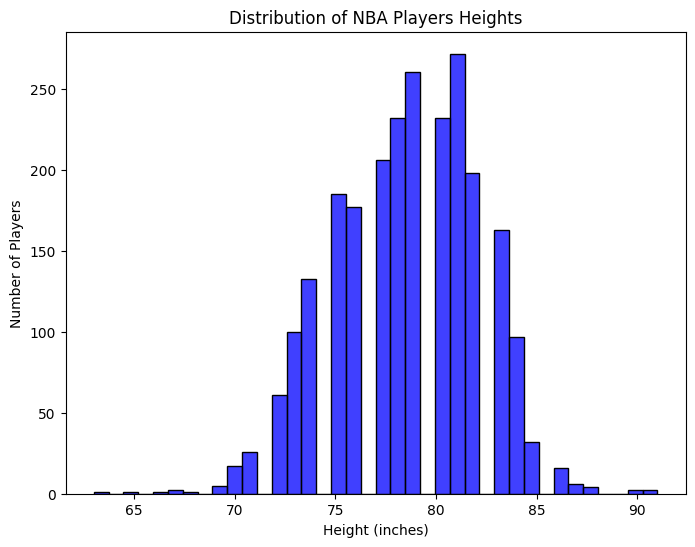

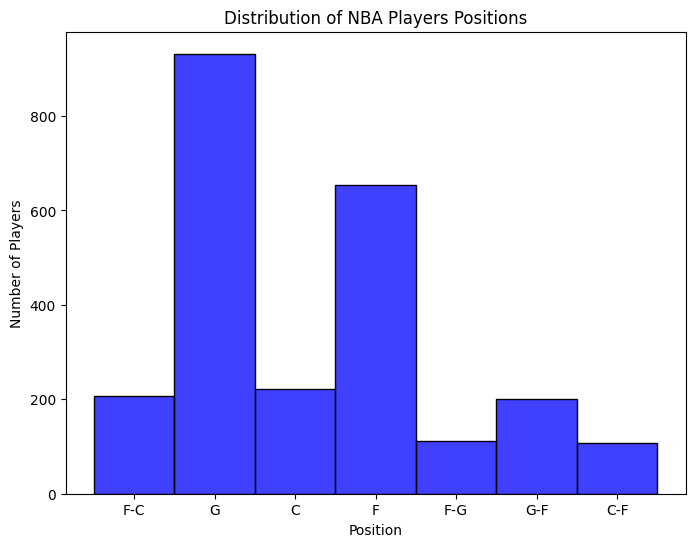

In [45]:
# Creates a histogram plot showing the distribution of height of all the nba players
plt.figure(figsize=(8, 6))
sns.histplot(data=career_stats, x='Height',  color='blue')
plt.xlabel('Height (inches)')
plt.ylabel('Number of Players')
plt.title('Distribution of NBA Players Heights')
plt.show()

# Creates a histogram plot showing the distribution of positions of all the nba players
plt.figure(figsize=(8, 6))
sns.histplot(data=career_stats, x='Pos', color='blue')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Distribution of NBA Players Positions')
plt.show()

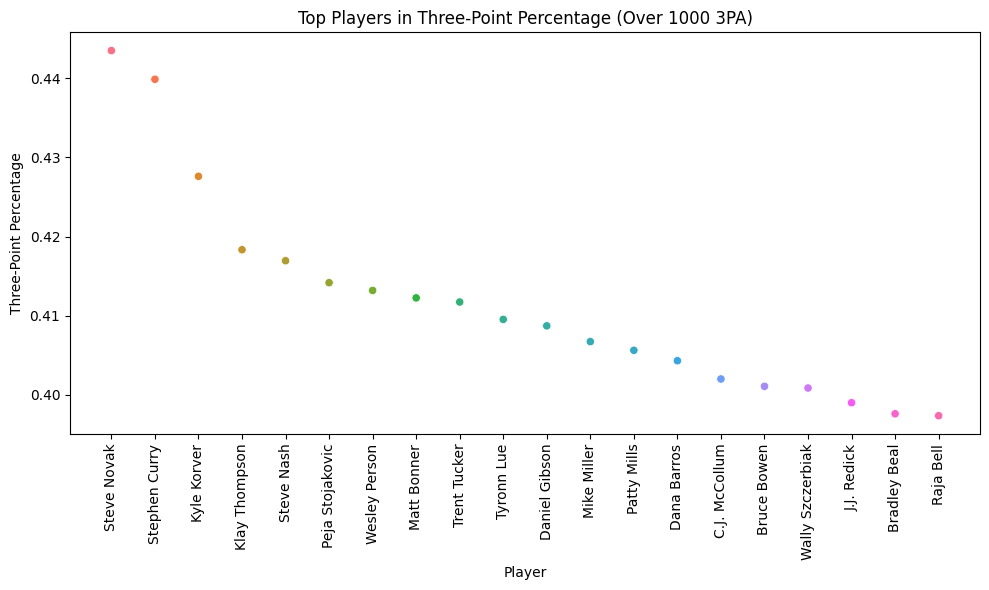

In [46]:
# Feel free to change code and test out plots that might interest you!
filtered_data = career_stats[career_stats['ThreePA'] > 1000] # can test different numbers

# Sorts to get the top players leading in 3P% with over 1000 3PA
top_3pt_players = filtered_data.sort_values('ThreePP', ascending=False)

# Gets certain columns we can look at and gets only the top 20 from the dataframe
top_3pt_players = top_3pt_players[['Player', 'G', 'ThreePA', 'ThreePP', 'Pos', 'year_start']].head(20)

# Plots a scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_3pt_players, x='Player', y='ThreePP', hue='Player', legend=False)

# Rotates the x-axis
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Three-Point Percentage')
plt.title('Top Players in Three-Point Percentage (Over 1000 3PA)')
plt.tight_layout()
plt.show()

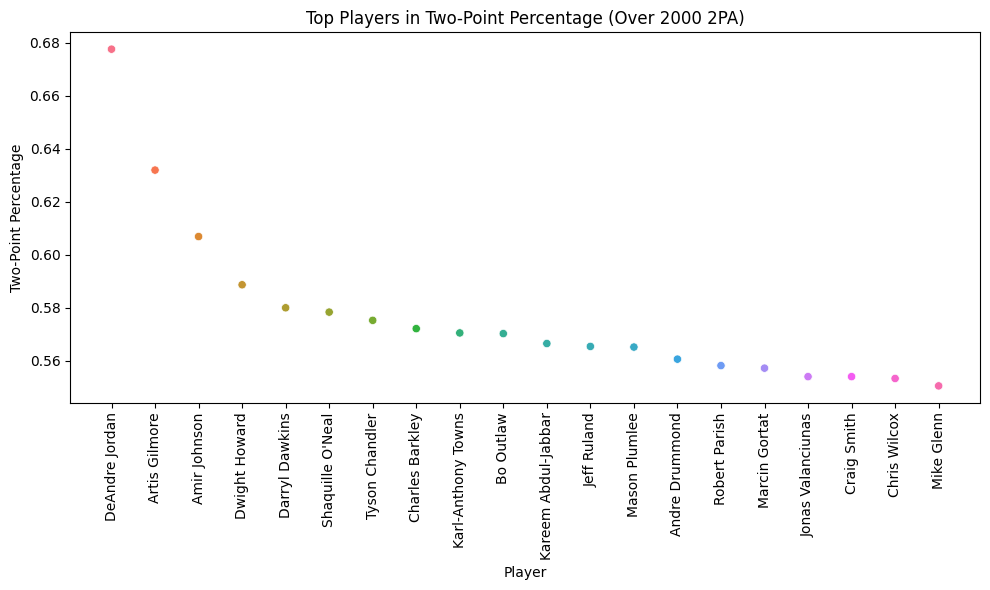

In [47]:
# Feel free to change code and test out plots that might interest you!
filtered_data = career_stats[career_stats['TwoPA'] > 2000]

top_2pt_players = filtered_data.sort_values('TwoPP', ascending=False)
top_2pt_players = top_2pt_players[['Player', 'G', 'TwoPA', 'TwoPP', 'Pos', 'year_start']].head(20)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_2pt_players, x='Player', y='TwoPP', hue='Player', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Two-Point Percentage')
plt.title('Top Players in Two-Point Percentage (Over 2000 2PA)')
plt.tight_layout()
plt.show()

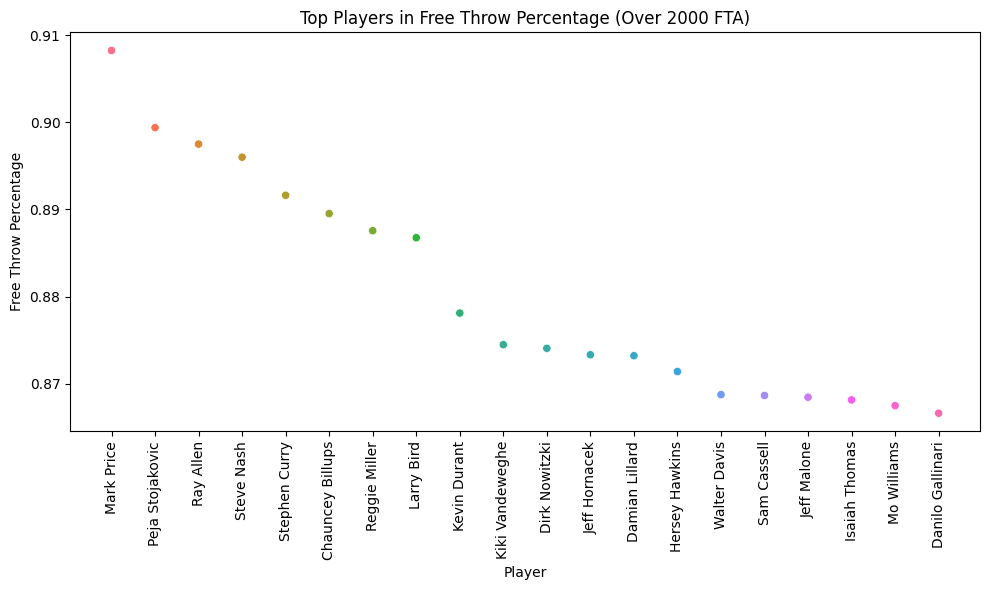

In [48]:
filtered_data = career_stats[career_stats['FTA'] > 2000]

top_ft_players = filtered_data.sort_values('FTP', ascending=False)
top_ft_players = top_ft_players[['Player', 'G', 'FTA', 'FTP', 'Pos', 'year_start']].head(20)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_ft_players, x='Player', y='FTP', hue='Player', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Free Throw Percentage')
plt.title('Top Players in Free Throw Percentage (Over 2000 FTA)')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top Shooters by Position')

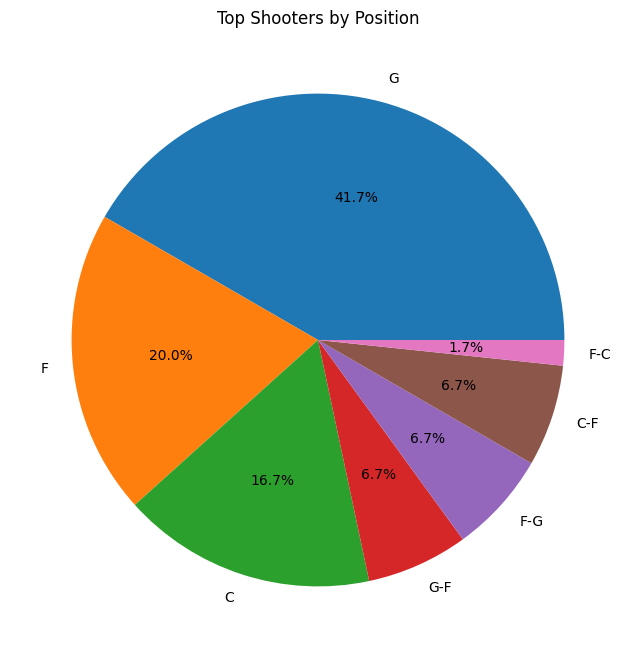

In [49]:
# Group the data by positions and count the occurrences
all_top_players = pd.concat([top_3pt_players, top_2pt_players, top_ft_players])
position_counts = all_top_players['Pos'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%')
plt.title('Top Shooters by Position')

<p>
How about we look at players shooting percentages over their years and their points per game.
</p>

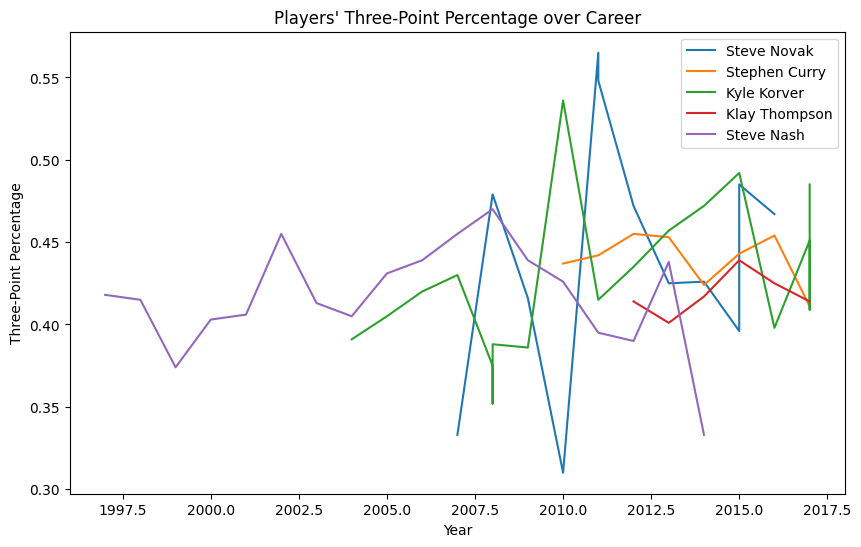

In [50]:
# Gets the top 5 players names from the top three point shooters
players = top_3pt_players['Player'][:5].values

plt.figure(figsize=(10, 6))
plt.title('Players\' Three-Point Percentage over Career')
plt.xlabel('Year')
plt.ylabel('Three-Point Percentage')

# Plot each player's data and label the line with their name
for player in players:
    df = season_stats.loc[season_stats['Player'] == player]
    plt.plot(df['Year'], df['ThreePP'], label=player)

# Adds a legend
plt.legend()

plt.show()

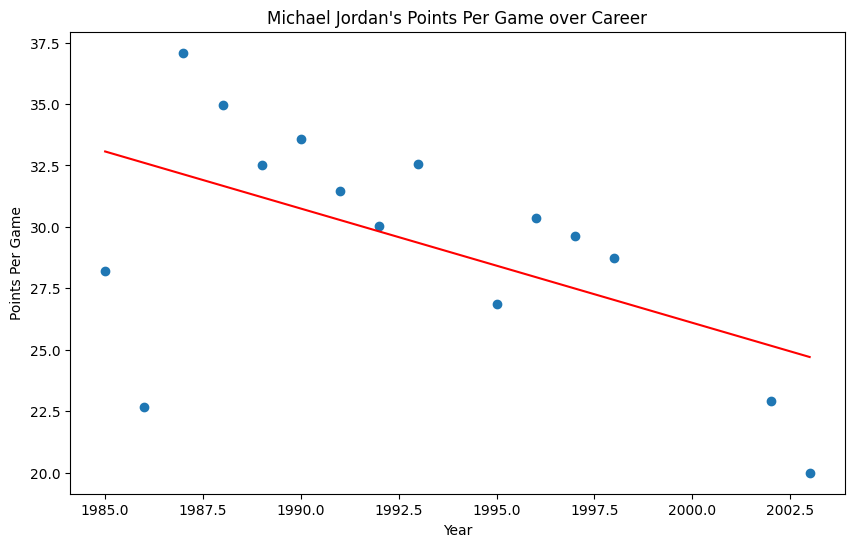

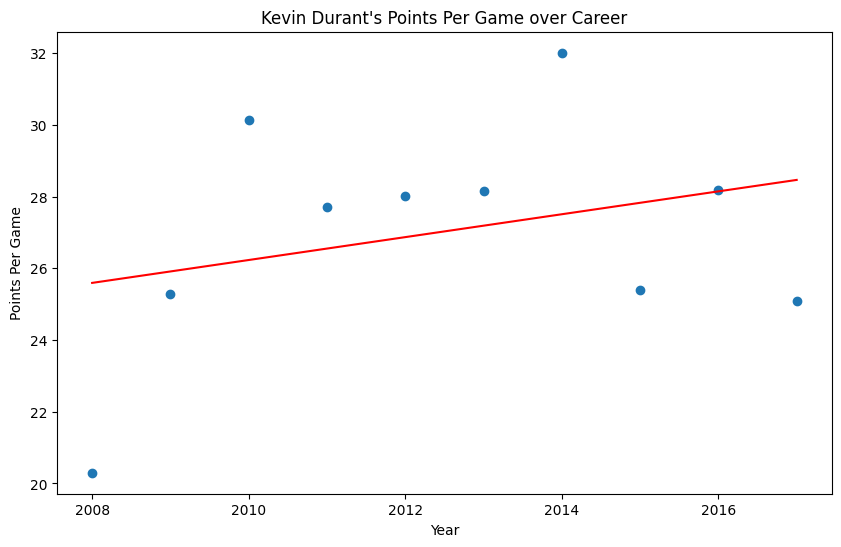

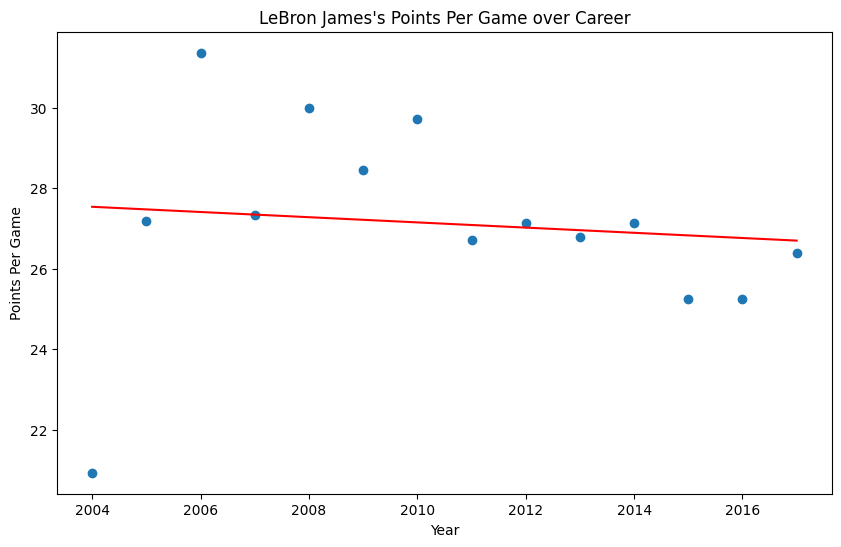

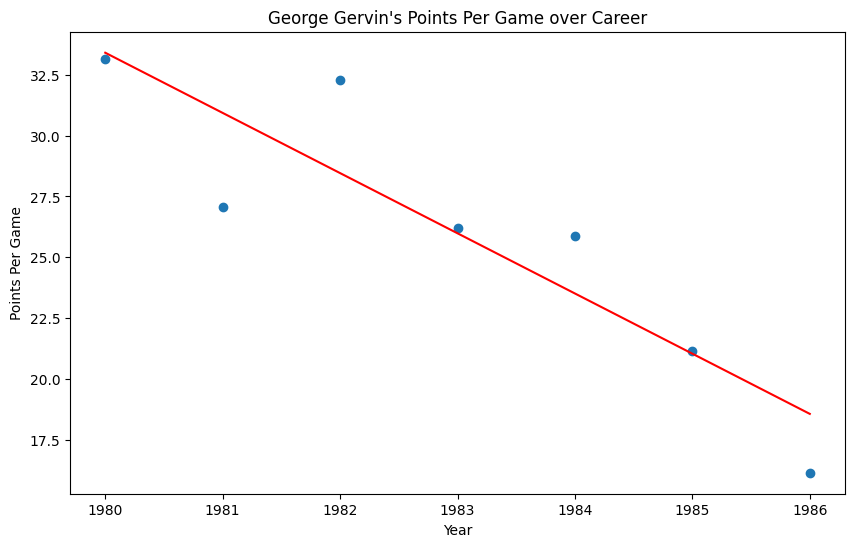

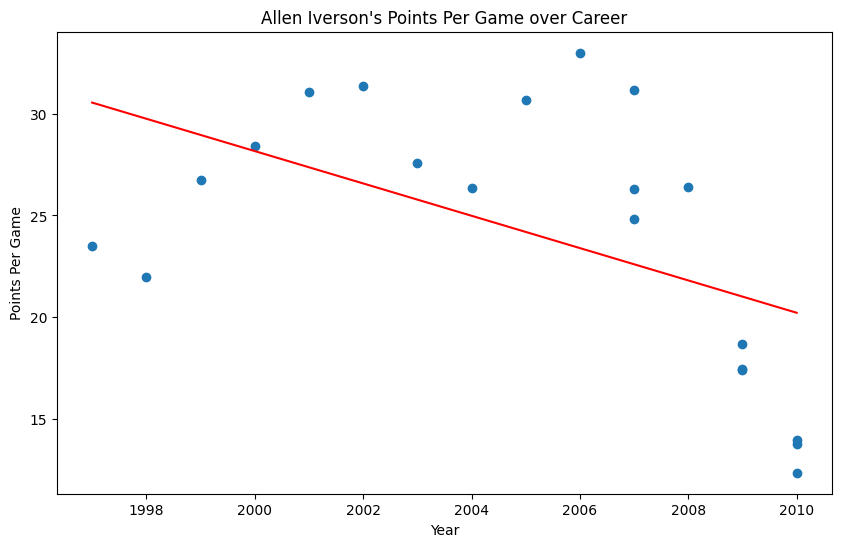

In [51]:
players = career_stats.sort_values('PPG', ascending=False).head(5)['Player'].values

# Make a plot for each player's data 
for player in players:
    # Gets all the seasons matching with the player's name
    df = season_stats.loc[season_stats['Player'] == player]

    # Makes a plot of PPG vs Year
    plt.figure(figsize=(10, 6))
    plt.title(f'{player}\'s Points Per Game over Career')
    plt.xlabel('Year')
    plt.ylabel('Points Per Game')
    plt.scatter(df['Year'], df['PPG'])

    # Make and plot a regression line to see the trend clearly - from scipy docs
    slope, intercept, r, p, se = linregress(df['Year'], df['PPG'])
    regression_line = intercept + slope * df['Year']
    plt.plot(df['Year'], regression_line, color='red', label='Regression Line')

    plt.show()

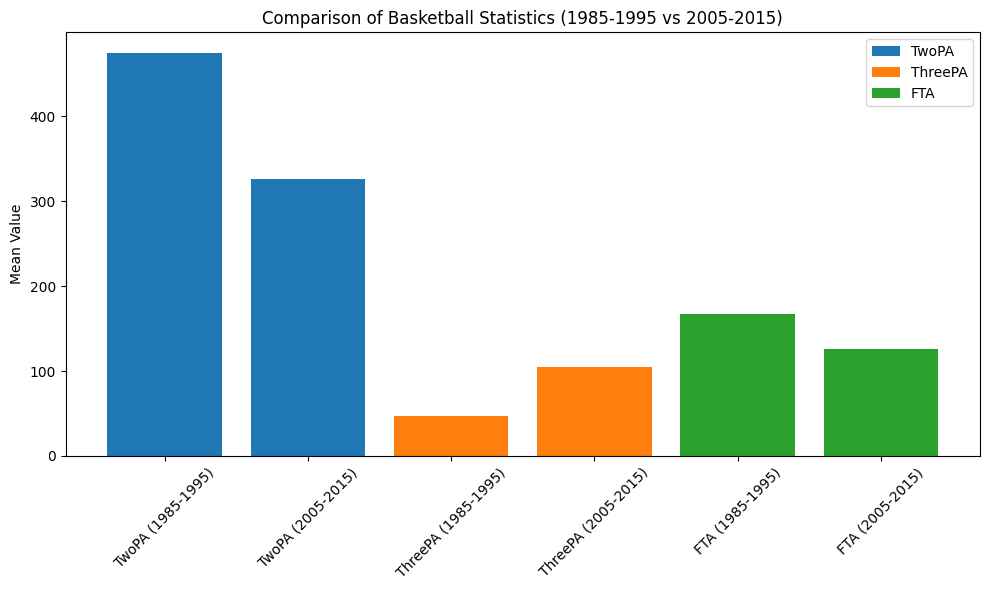

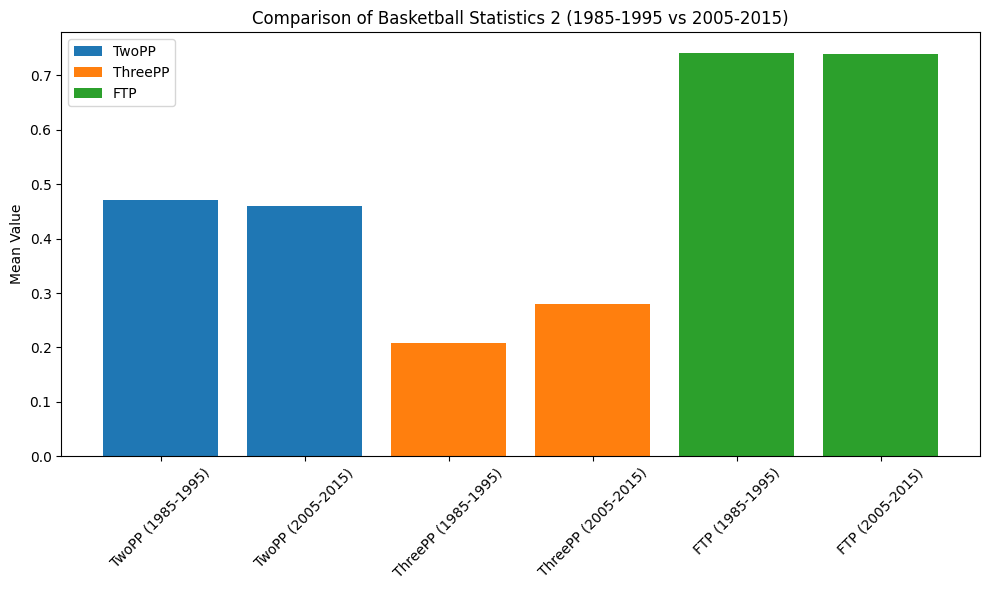

In [52]:
selected_columns = ['Year', 'ThreePP', 'ThreePA', 'TwoPP', 'TwoPA', 'FTA', 'FTP']
data = season_stats[selected_columns].dropna()

# Filter data for the two time periods (1985-1995 and 2005-2015)
period_1 = data[(data['Year'] >= 1985) & (data['Year'] <= 1995)]
period_2 = data[(data['Year'] >= 2005) & (data['Year'] <= 2015)]

# Calculate means for each category in the two periods
period_1_means = period_1.mean()
period_2_means = period_2.mean()

# Categories to compare
categories = ['TwoPA', 'ThreePA', 'FTA']
categories2 = ['TwoPP', 'ThreePP', 'FTP']

# Plotting
plt.figure(figsize=(10, 6))
for category in categories:
    plt.bar([category + ' (1985-1995)', category + ' (2005-2015)'],
            [period_1_means[category], period_2_means[category]],
            label=category)

plt.title('Comparison of Basketball Statistics (1985-1995 vs 2005-2015)')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
for category in categories2:
    plt.bar([category + ' (1985-1995)', category + ' (2005-2015)'],
            [period_1_means[category], period_2_means[category]],
            label=category)

plt.title('Comparison of Basketball Statistics 2 (1985-1995 vs 2005-2015)')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<h2 style='text-align: center'>Hypothesis Testing and Machine Learning</h2>

In [53]:
correlation_3pt = career_stats['Height'].corr(career_stats['ThreePP'])
correlation_2pt = career_stats['Height'].corr(career_stats['TwoPP'])
correlation_ftp = career_stats['Height'].corr(career_stats['FTP'])
correlation_tsp = career_stats['Height'].corr(career_stats['TSP'])

print(f'3P%: {correlation_3pt}')
print(f'2P%: {correlation_2pt}')
print(f'FT%: {correlation_ftp}')
print(f'TS%: {correlation_tsp}')

3P%: -0.2751245266847028
2P%: 0.23102489646393634
FT%: -0.25524495275667347
TS%: 0.1619335977705168


In [54]:
# Creates a model with OLS
model = smf.ols(formula="ThreePP ~ Height", data=career_stats).fit()
print(model.summary())
print(f'F-Statistic: {model.fvalue}')
print(f'P-value: {model.f_pvalue}')

                            OLS Regression Results                            
Dep. Variable:                ThreePP   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     199.1
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           1.65e-43
Time:                        17:21:29   Log-Likelihood:                 1149.8
No. Observations:                2433   AIC:                            -2296.
Df Residuals:                    2431   BIC:                            -2284.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1745      0.068     17.392      0.0

In [25]:
model2 = smf.ols(formula="TwoPP ~ Height", data=career_stats).fit()
print(model2.summary())
print(f'F-Statistic: {model2.fvalue}')
print(f'P-value: {model2.f_pvalue}')

                            OLS Regression Results                            
Dep. Variable:                  TwoPP   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     137.1
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           7.73e-31
Time:                        15:34:01   Log-Likelihood:                 2916.1
No. Observations:                2433   AIC:                            -5828.
Df Residuals:                    2431   BIC:                            -5817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0696      0.033      2.132      0.0

In [28]:
model_data = season_stats[['Age', 'PPG', 'ThreePP', 'TwoPP', 'FTP', 'TSP', 'ThreePA', 'TwoPA', 'FTA', 'G']]
model_data = model_data[model_data['G'] > 50]

y = model_data['PPG']
X = model_data.drop('PPG', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize and train a linear regression model
degree = 3  # Degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

model = lm.LinearRegression()
model.fit(X_poly, y)


name = 'LeBron James'

player = season_stats[season_stats['Player'] == name]
player = player[player['Age'] == 30]
# print(player)
# Predict PPG for a certain age using new data
# # new_data = pd.DataFrame({'Age': [34], 'ThreePP': [player['ThreePP']], 'TwoPP': [player['TwoPP']], 
#                          'FTP': [player['FTP']], 'TSP':[player['TSP']], 
#                          'ThreePA':[player['ThreePA']], 'TwoPA':[player['TwoPA']], 'FTA': [player['FTA']], 'G':[player['G']]})

# new_data = pd.DataFrame({'Age': [39], 'ThreePP': [.35], 'TwoPP': [.58], 
#                          'FTP': [.73], 'TSP':[.522], 
#                          'ThreePA':[8*55], 'TwoPA':[13*55], 'FTA': [5.2*55], 'G':[55]})

input_threepp = player['ThreePP'].values[0] * .65
input_twopp = player['ThreePP'].values[0] * .9
input_ftp = player['FTP'].values[0] * .9
input_threepa = player['ThreePA'].values[0] * .65
input_twopa = player['TwoPA'].values[0] * .65
input_fta = player['FTA'].values[0] * .65
input_tsp = player['TSP'].values[0] * .9
input_g = player['G'].values[0] * .9

# Create input features array
input_features = np.array([[38, input_threepp, input_twopp, input_ftp, input_tsp, input_threepa, input_twopa, input_fta, input_g]])

input_poly = poly.transform(input_features)
predicted_ppg = model.predict(input_poly)

print(f"Predicted PPG: {predicted_ppg[0]}")


Predicted PPG: 14.415088912079742


c:\Users\Guest1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


<h2 style='text-align:center'>Conclusion</h2>